In [7]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import glob
from tifffile import imread
from csbdeep.utils import download_and_extract_zip_file, plot_some
from csbdeep.data import RawData, create_patches


In [8]:
raw_data = RawData.from_folder (
    basepath    = '/data/u934/service_imagerie/v_kapoor/StarDistTraining/train',
    source_dirs = ['images'],
    target_dir  = 'masks',
    axes        = 'YX',
)


In [9]:

basepath    = '/data/u934/service_imagerie/v_kapoor/StarDistTraining/train/images'
targetpath    = '/data/u934/service_imagerie/v_kapoor/StarDistTraining/train/masks'
save_file       = '/data/u934/service_imagerie/v_kapoor/StarDistTraining/UnetSegmentation.npz'
Path = os.path.join(basepath, '*.tif')
X = []
Names = []

filesRaw = glob.glob(Path)

for fname in filesRaw:
     x = imread(fname)
     X.append(x)
     Names.append(fname)
X.sort

targetPath = os.path.join(targetpath, '*.tif')
Y = []


targetfilesRaw = glob.glob(targetPath)

for fname in targetfilesRaw:
     y = imread(fname)
     Y.append(x)
     
Y.sort
axes = 'YX'
print('Total number of training = ', len(X), len(Y))
print('Image size = ', X[0].shape )
count = min(0, len(X))
X, Y, XY_axes = create_patches (
    raw_data            = raw_data,
    
    patch_size          = (64, 64),
    n_patches_per_image = 100,
    save_file           = save_file,
)

Total number of training =  447 447
Image size =  (256, 256)
  447 raw images x    1 transformations   =   447 images
  447 images     x  100 patches per image = 44700 patches in total
Input data:
/data/u934/service_imagerie/v_kapoor/StarDistTraining/train: target='masks', sources=['images'], axes='YX', pattern='*.tif*'
Transformations:
1 x Identity
Patch size:
64 x 64


100%|██████████| 447/447 [00:06<00:00, 67.63it/s]


Saving data to /data/u934/service_imagerie/v_kapoor/StarDistTraining/UnetSegmentation.npz.


In [10]:
assert X.shape == Y.shape
print("shape of X,Y =", X.shape)
print("axes  of X,Y =", XY_axes)

shape of X,Y = (44700, 1, 64, 64)
axes  of X,Y = SCYX


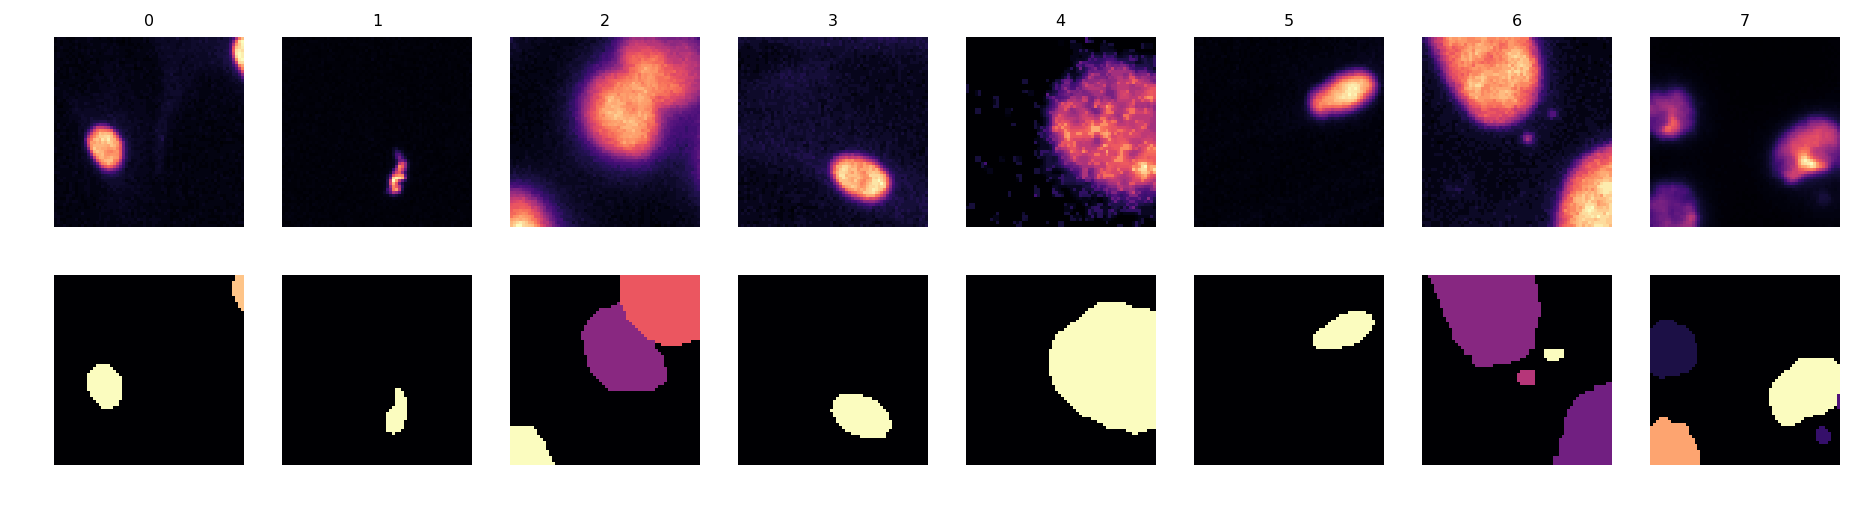

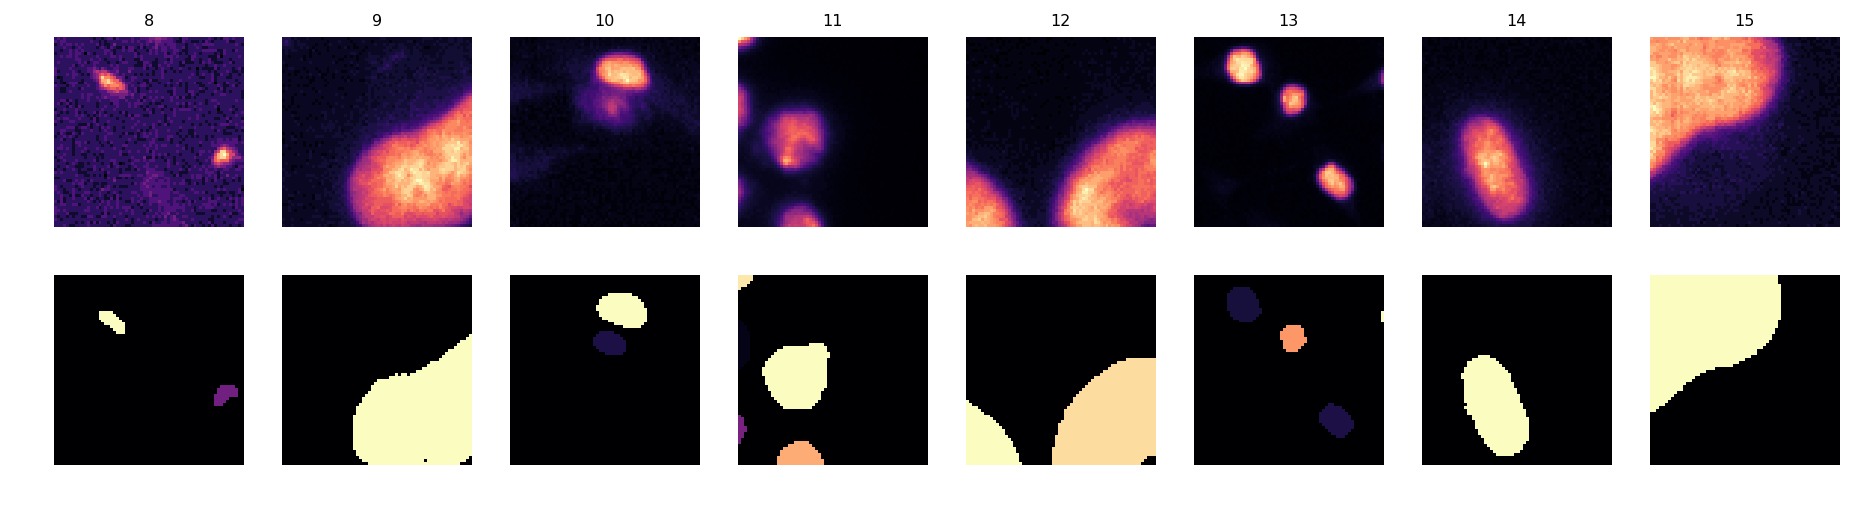

In [11]:
for i in range(2):
    plt.figure(figsize=(16,4))
    sl = slice(8*i, 8*(i+1)), 0
    plot_some(X[sl],Y[sl],title_list=[np.arange(sl[0].start,sl[0].stop)])
    plt.show()
None;